In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

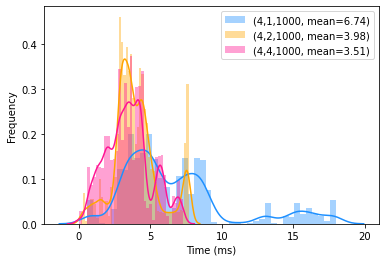

In [5]:
df = pd.read_csv("results.csv")

# filter producer, consumer per queue
queuesize = [50, 200, 1000]
producers = [1, 2, 4]
consumers = [1, 2, 4]
listOfColors = ["dodgerblue", "orange", "deeppink", "purple"]

# todo: error bar

# create a grid of histograms
for i in producers:
    for j in queuesize:
        plt.clf()
        for k,colors in zip(consumers,listOfColors):
            filt = df[(df["consumers"] == k) & (df["producers"] == i) & (df["queuesize"] == j)]
            sns.distplot(filt["time"], color=colors, label="(" + str(i) + "," + str(k) + "," + str(j) + ", mean=" + str(math.ceil(10**2*filt["time"].mean())/10**2)+ ")")
            plt.legend()
            plt.xlabel("Time (ms)")
            plt.ylabel("Frequency")
        plt.savefig("report/assets/" + str(i) + "_" + str(j) + ".png", dpi=300)